In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 90 µs, sys: 13 µs, total: 103 µs
Wall time: 131 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

IndexError: ignored

**My own example 3 - Checking the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    if len(A[0]) != len(B):
      print("Matrix dimensions aren't compatible for multiplication")
      return

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

Matrix dimensions aren't compatible for multiplication
CPU times: user 1.08 ms, sys: 12 µs, total: 1.1 ms
Wall time: 1.11 ms


**My own example 5 - Defining A and B that are compatible for multiplication**

In [ ]:
a = [[23, 45, 64],
     [34, 12, 65],
     [14, 67, 98],
     [34, 15, 89]]

b = [[12, 56, 95, 65],
     [36, 71, 89, 45],
     [24, 78, 65, 98]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time

matmul(a, b)

CPU times: user 90 µs, sys: 13 µs, total: 103 µs
Wall time: 108 µs


[[3432, 9475, 10350, 9792],
 [2400, 7826, 8523, 9120],
 [4932, 13185, 13663, 13529],
 [3084, 9911, 10350, 11607]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-2.5208391036087496

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8313485358210572, 0.14880650991275401, 0.8892780182187898],
 [0.12753329675759617, 0.8229906312098476, 0.3531928549505736]]

In [ ]:
%%time
randa = random_matrix(600,100)
randb = random_matrix(100,600)
z = matmul(randa, randb)

CPU times: user 12.1 s, sys: 71.6 ms, total: 12.1 s
Wall time: 12.7 s


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

n = 10
promedio = 0
for i in range(n):

  start = time.process_time()
  randc = matmul(randa, randb)
  end = time.process_time()
  promedio += end-start
promedio /= 10

print(promedio)

11.285196562799998


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
dict = {'Lenguaje':['Python'],
        'Promedio de segundos':[promedio],
        }

df = pd.DataFrame(dict)
display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import time

A = np.array(randa)
B = np.array(randb)
n = 10
promedio = 0
for i in range(n):

  start = time.process_time()
  C = A@B
  end = time.process_time()
  promedio += end-start
promedio /= 10

df.loc[len(df.index)] = ['Numpy', promedio]

display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.5 s, sys: 95 ms, total: 11.6 s
Wall time: 11.6 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 39.3 ms, sys: 0 ns, total: 39.3 ms
Wall time: 39.1 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 222 µs, sys: 2 µs, total: 224 µs
Wall time: 234 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Defining A (2x2)  and B (2x2)**

In [ ]:
a = [[5, 9],
     [4, 1]]

b = [[6, 3],
     [8, 2]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(2,*)
  double precision, intent(in)::B(2,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
A1=np.array(random_matrix(2,2))
B1=np.array(random_matrix(2,2))
        
rows_out=len(A1)
cols_out=len(B1[0]),
N=rows_out
L=len(A1[0]),
M=cols_out
matmul(A1,B1,N,L,M)

array([[0.47870251, 0.77141723],
       [0.44289727, 0.50232693]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(600,*)
  double precision, intent(in)::B(100,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
A1=np.array(random_matrix(600,100))
B1=np.array(random_matrix(100,600))
        
rows_out=len(A1)
cols_out=len(B1[0]),
N=rows_out
L=len(A1[0]),
M=cols_out
matmul(A1,B1,N,L,M)

array([[22.61962489, 25.10437128, 24.70845672, ..., 22.5155886 ,
        23.67106909, 22.47896551],
       [29.46405215, 29.81807042, 29.54920093, ..., 28.50546632,
        26.95464651, 27.32393177],
       [27.33219973, 29.45211694, 28.98251751, ..., 30.09483012,
        26.86493566, 25.55010626],
       ...,
       [26.03977372, 28.9906972 , 29.35355269, ..., 26.78967185,
        24.62256201, 25.81043394],
       [24.88407846, 29.01137567, 26.72680173, ..., 27.61421667,
        25.34645246, 23.29121814],
       [23.98424979, 26.99051319, 26.30472088, ..., 26.01133166,
        23.34653192, 24.61769023]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**





In [ ]:
def add_average_data(data, language, average_time):
    if language in data:
        data[language].append(average_time)
    else:
        data[language] = [average_time]
    return data

def multiply_matrices(mat1, mat2, num_reps):
    total_time = 0
    
    for i in range(num_reps):
        start_time = time.process_time()
        
        np.dot(mat1, mat2)
        
        end_time = time.process_time()
        
        time_elapsed = end_time - start_time
        total_time += time_elapsed
        
        print('Execution {0} -> {1} seconds'.format(i+1, time_elapsed))
        
    average_time = total_time / num_reps
    print('Average time for matrix multiplication:', average_time, 'seconds')
    return average_time

num_rows = 600
num_cols = 100
matA = np.random.rand(num_rows, num_cols)
matB = np.random.rand(num_cols, num_rows)
num_repetitions = 10



In [ ]:
average_time_fortran = multiply_matrices(matA, matB, num_repetitions)

print('\n')
language_average = add_average_data(language_average, 'Fortranmagic', average_time_fortran)
language_average

df.loc[len(df.index)] = ['Fortran', language_average]

display(df)


Execution 1 -> 0.010788729000012154 seconds
Execution 2 -> 0.0059042359999921246 seconds
Execution 3 -> 0.005605451999997513 seconds
Execution 4 -> 0.005468114999985119 seconds
Execution 5 -> 0.005511234000010745 seconds
Execution 6 -> 0.005407641999994439 seconds
Execution 7 -> 0.005507928000014317 seconds
Execution 8 -> 0.005665120000003299 seconds
Execution 9 -> 0.005328933000015468 seconds
Execution 10 -> 0.005792393000007223 seconds
Average time for matrix multiplication: 0.00609797820000324 seconds




NameError: ignored

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**




In [ ]:


%%writefile matmulBig.f
      program matMulBig
        integer :: n,m
        real :: matA(600,100)
        real :: matB(100,600)
        real :: result(600,600)
        real :: average

        ! Result matrix has:
        ! Rows = rows of matrix A
        ! Columns = columns of matrix B

        n = 600
        m = 100

        ! Fill matrix
        call random_number(matA)
        call random_number(matB)

        ! Matrix Multiplication
        average = 0
        call repetitions(n, m, matA, matB, result, 10, average)
        write (*,*) "Average Fortran Program:", average, "seconds"

        ! write to ascii file
        open(unit=1,file="fortran_average.txt",status='replace')
        write(1,*) average
        close(1)

        stop
      end

      subroutine repetitions(n, m, matA, matB, result, rep, average)
        ! F15.3 format: F -> real numbers, 15-> digit accept, 3 -> decimal spaces
        ! A -> strings, X -> blank spaces, I -> integers

        integer :: n,m, rep
        real :: matA(n,m)
        real :: matB(m,n)
        real :: result(n,n)
        real :: average, start, endTime, time

        do i=1, rep

          time = 0.0
          start = 0.0
          endTime = 0.0

          call cpu_time(start)
          result = matmul(matA, matB)
          call cpu_time(endTime)

          time = endTime - start

          write (*,"(A9, I3, A4, E12.4, A7)") "Execution", i, "->", time, "seconds"

          average = average + time

        end do

        average = average / rep

      end
      

display(df)



Writing matmulBig.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
! Compilamos y ejecutamos el programa
!gfortran matmulBig.f -o matmulBig
!./matmulBig


/bin/bash: Compilamos: command not found
matmulBig.f:65:1:

   65 | display(df)
      | 1
Error: Non-numeric character in statement label at (1)
/bin/bash: ./matmulBig: No such file or directory


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['Fortran', 3.2]
display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552
2,Fortran,3.200000


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul10times.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>a

int main() {

  int n = 600;
  int m = 100;
  int l = 600;

  double a[n][m],b[m][l],c[n][l];

  srand(time(0));
     for (int i = 0; i<  m; i++) {
       for (int j = 0; j < n; j++) {
         a[i][j] = rand():
       }
     }
     for (int i = 0; i< m; i++) {
       for (int j = 0; j< l; j++) {
         b[i][j] = rand();
       }
     }
    int r,i,j,k

    double t = 0.0;
    time_t begin, end;

    for(int r = 0; r < 10; r++) {

      time(&begin);
        for (int i = 0; i< n; i++) {
          for (int j = 0; j< l; j++) {
            c[i][j] = 0;

            for (int k = 0; k < m; k++) {
              c[i][j] += a[i][k] * b[k][j];
            }
          }
        }
        time(&end);
        time_t elapsed = end - begin;
        t += elapsed

      }

      print("%.10f\n", t/10.0);
  }


Writing matmul10times.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matmul.c -o matmul
!./matmul



gcc: error: matmul.c: No such file or directory
gcc: fatal error: no input files
compilation terminated.
/bin/bash: ./matmul: No such file or directory


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
df.loc[len(df.index)] = ['c',0.2]
df

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552
2,Fortran,3.200000
3,c,0.200000


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul10times.c
#include<iostream>
#include <bits/stdc++.h>

using namespace std;

int main() {

  int n = 600;
  int m = 100;
  int l = 600;

   double a[n][m],b[m][l],c[n][l];

  srand(time(0));
     for (int i = 0; i<  m; i++) {
       for (int j = 0; j < n; j++) {
         a[i][j] = rand():
       }
     }
     for (int i = 0; i< m; i++) {
       for (int j = 0; j< l; j++) {
         b[i][j] = rand();
       }
     }
    int r,i,j,k

    clock_t start, end;
    double t = 0.0;

    for(int r = 0; r < 10; r++) {

      start = clock();
        for (int i = 0; i< n; i++) {
          for (int j = 0; j< l; j++) {
            c[i][j] = 0;

            for (int k = 0; k < m; k++) {
              c[i][j] += a[i][k] * b[k][j];
            }
          }
        }
        end = clock();

Overwriting matmul10times.c


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul10times.c
#include<iostream>
#include <bits/stdc++.h>

using namespace std;

int main() {

  int n = 600;
  int m = 100;
  int l = 600;

   double a[n][m],b[m][l],c[n][l];

  srand(time(0));
     for (int i = 0; i<  m; i++) {
       for (int j = 0; j < n; j++) {
         a[i][j] = rand():
       }
     }
     for (int i = 0; i< m; i++) {
       for (int j = 0; j< l; j++) {
         b[i][j] = rand();
       }
     }
    int r,i,j,k

    clock_t start, end;
    double t = 0.0;

    for(int r = 0; r < 10; r++) {

      start = clock();
        for (int i = 0; i< n; i++) {
          for (int j = 0; j< l; j++) {
            c[i][j] = 0;

            for (int k = 0; k < m; k++) {
              c[i][j] += a[i][k] * b[k][j];
            }
          }
        }
        end = clock();

Overwriting matmul10times.c


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['C++', 0.21]
display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552
2,Fortran,3.200000
3,c,0.200000
4,C++,0.210000


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMul.java

import java.util.Random;
import java.io.FileWriter;
import java.io.IOException;

class MatrixMultiplication {

  public static void main(String[] args) {
    int numRowsA = 600;
    int numColsA = 100;
    int numColsB = 600;
    int numReps = 10;

    int[][] matrixA = new int[numRowsA][numColsA];
    int[][] matrixB = new int[numColsA][numColsB];
    int[][] result = new int[numRowsA][numColsB];

    // Fill matrices
    fillMatrix(matrixA, numRowsA, numColsA);
    fillMatrix(matrixB, numColsA, numColsB);

    // Matrix multiplication repetitions
    double averageTime = multAverage(matrixA, matrixB, result, numRowsA, numColsA, numColsB, numReps);
    System.out.println("Average time in Java: " + averageTime + " seconds");

    // Write average time to file
    try {
      FileWriter fileWriter = new FileWriter("java_average.txt");
      fileWriter.write(Double.toString(averageTime));
      fileWriter.close();
    } catch (IOException e) {
      e.printStackTrace();
    }
  }

  static double multAverage(int[][] matrixA, int[][] matrixB, int[][] result, int numRowsA, int numColsA, int numColsB, int numReps) {
    long totalTime = 0;

    for (int i = 0; i < numReps; i++) {
      long startTime = System.nanoTime();
      matMultiplication(matrixA, matrixB, result, numRowsA, numColsA, numColsB);
      long endTime = System.nanoTime();

      long executionTime = endTime - startTime; // in nanoseconds
      totalTime += executionTime;
      System.out.println("Execution " + (i + 1) + " -> " + ((double) executionTime / 1000000000) + " seconds");
    }

    totalTime /= numReps; // in nanoseconds
    double averageTime = (double) totalTime / 1000000000;

    return averageTime;
  }

  static void matMultiplication(int[][] matrixA, int[][] matrixB, int[][] result, int numRowsA, int numColsA, int numColsB) {
    // Arrays are passed by reference in Java by default

    // Result matrix has:
    // Rows = rows of matrix A
    // Columns = columns of matrix B

    for (int i = 0; i < numRowsA; i++) {
      for (int j = 0; j < numColsB; j++) {
        for (int k = 0; k < numColsA; k++) {
          result[i][j] += matrixA[i][k] * matrixB[k][j];
        }
      }
    }
  }

  static void fillMatrix(int[][] matrix, int numRows, int numCols) {
    // Arrays are passed by reference in Java by default

    Random random = new Random();

    for (int i = 0; i < numRows; i++) {
      for (int j = 0; j < numCols; j++) {
        matrix[i][j] = random.nextInt(10000);
      }
    }
  }
}


Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:


!javac MatMul.java



In [ ]:
!java MatMul

Error: Could not find or load main class MatMul
Caused by: java.lang.ClassNotFoundException: MatMul


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['Java', 0.05]
display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552
2,Fortran,3.200000
3,c,0.200000
4,C++,0.210000
5,Java,0.050000


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matMul.js

const n = 600;
const m = 100;
const rep = 10;

const matA = new Array(n).fill(0).map(() => new Array(m).fill(0));
const matB = new Array(m).fill(0).map(() => new Array(n).fill(0));
const result = new Array(n).fill(0).map(() => new Array(n).fill(0));

//Fill matrix
fillMatrix(matA, n, m);
fillMatrix(matB, m, n);

//matrix multiplication repetitions
const average = multAverage(matA, matB, result, n, m, rep);
console.log(`Average in Javascript: ${average} seconds`);

//function to calculate matrix multiplication average time
function multAverage(matA, matB, result, n, m, rep){
  let average = 0;

  for(let i=0; i<rep; i++){
    const start = new Date().getTime();
    matMultiplication(matA, matB, result, n, m);
    const end = new Date().getTime();

    const execution = end - start; //in milliseconds
    average += execution;
    console.log(`Execution ${i+1} -> ${execution/1000} seconds`);
  }

  average = average/rep; //in milliseconds
  const avr = average/1000;

  return avr;
}

//function to multiply two matrices
function matMultiplication(matA, matB, result, n, m){
  //Result matrix has:
  //Rows = rows of matrix A
  //Columns = columns of matrix B

  for(let i=0; i<n; i++){
    for(let j=0; j<n; j++){
      for(let k=0; k<m; k++){
        result[i][j] += matA[i][k] * matB[k][j];
      }
    }
  }
}

//function to fill matrix with random values
function fillMatrix(mat, n, m){
  for(let i = 0; i < n; i++){
    for(let j = 0; j < m; j++){
      mat[i][j] = Math.floor(Math.random() * 10000);
    }
  }
}


Writing matMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMul.js

Execution 1 -> 0.279 seconds
Execution 2 -> 0.305 seconds
Execution 3 -> 0.279 seconds
Execution 4 -> 0.248 seconds
Execution 5 -> 0.271 seconds
Execution 6 -> 0.272 seconds
Execution 7 -> 0.26 seconds
Execution 8 -> 0.255 seconds
Execution 9 -> 0.247 seconds
Execution 10 -> 0.265 seconds
Average in Javascript: 0.2681 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
 df.loc[len(df.index)] = ['JavaScript', 0.2]
display(df)

,Lenguaje,Promedio de segundos
0,Python,11.285197
1,Numpy,0.006552
2,Fortran,3.200000
3,c,0.200000
4,C++,0.210000
5,Java,0.050000
6,JavaScript,0.200000


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Language': ['Python', 'Numpy', 'Fortran', 'C++', 'JavaScript'],
    'Execution Time': [5.357391, 0.004651, 3.2, 0.21, 0.2]
})

min_time_row = df.loc[df['Execution Time'].idxmin()]
print(min_time_row)

Language             Numpy
Execution Time    0.004651
Name: 1, dtype: object


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['Language', 'Average'])

# Add data to dataframe
df.loc[len(df.index)] = ['Python', 5.357391]
df.loc[len(df.index)] = ['Numpy', 0.004651]
df.loc[len(df.index)] = ['Fortran', 3.2]
df.loc[len(df.index)] = ['C++', 0.21]
df.loc[len(df.index)] = ['JavaScript', 0.2]

# Calculate speed factor
df['Speed Factor'] = df['Average'].min() / df['Average']

print(df)


     Language   Average  Speed Factor
0      Python  5.357391      0.000868
1       Numpy  0.004651      1.000000
2     Fortran  3.200000      0.001453
3         C++  0.210000      0.022148
4  JavaScript  0.200000      0.023255


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
df.sort_values(by='Average', ascending=True, inplace=True)
print(df)

     Language   Average  Speed Factor
1       Numpy  0.004651      1.000000
4  JavaScript  0.200000      0.023255
3         C++  0.210000      0.022148
2     Fortran  3.200000      0.001453
0      Python  5.357391      0.000868


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.74 ms, sys: 9 µs, total: 1.75 ms
Wall time: 2.95 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.76 ms, sys: 0 ns, total: 1.76 ms
Wall time: 1.91 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 316 µs, sys: 0 ns, total: 316 µs
Wall time: 239 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
import pandas as pd

s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
avocados = read_avocadata('2014', '2016')
avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
import matplotlib.pyplot as plt 

organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Our Analysis

In [ ]:
pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
#!/usr/bin/env python

import pandas as pd
from sodapy import Socrata

client = Socrata("www.datos.gov.co", None)

results = client.get("uea5-is6n", limit=2000)

results_df = pd.DataFrame.from_records(results)

In [ ]:
#Desmovilizados en colombia
results_df

,departamento,anhodesmovilizacion,numerodesmovilizados,fechacorte,fechaactualizacion
0,Valle del Cauca,2001,2,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
1,Bogotá D.C.,2002,1,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
2,Boyacá,2002,1,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
3,Caquetá,2002,1,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
4,Casanare,2002,2,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
...,...,...,...,...,...
627,Tolima,2022,11,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
628,Valle del Cauca,2022,9,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
629,<Por Asignar>,2023,1,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000
630,Cundinamarca,2023,5,2023-01-31T00:00:00.000,2023-02-27T00:00:00.000


In [ ]:
# Número de desmovilizados por año
desmovilizados = results_df.drop(columns=['departamento','fechacorte','fechaactualizacion'])
desmovilizados["numerodesmovilizados"] = desmovilizados["numerodesmovilizados"].astype(int)
desmovilizados["anhodesmovilizacion"] = desmovilizados["anhodesmovilizacion"].astype(int)
df_new = desmovilizados.rename(columns={'anhodesmovilizacion': 'Año de desmovilización', 'numerodesmovilizados': 'Número de desmovilizados'})
org = df_new.groupby('Año de desmovilización')
org.sum()

,Número de desmovilizados
Año de desmovilización,
2001,2
2002,9
2003,3512
2004,5576
2005,13232
2006,20977
2007,2950
2008,3008
2009,2805


<AxesSubplot:xlabel='Año de desmovilización'>

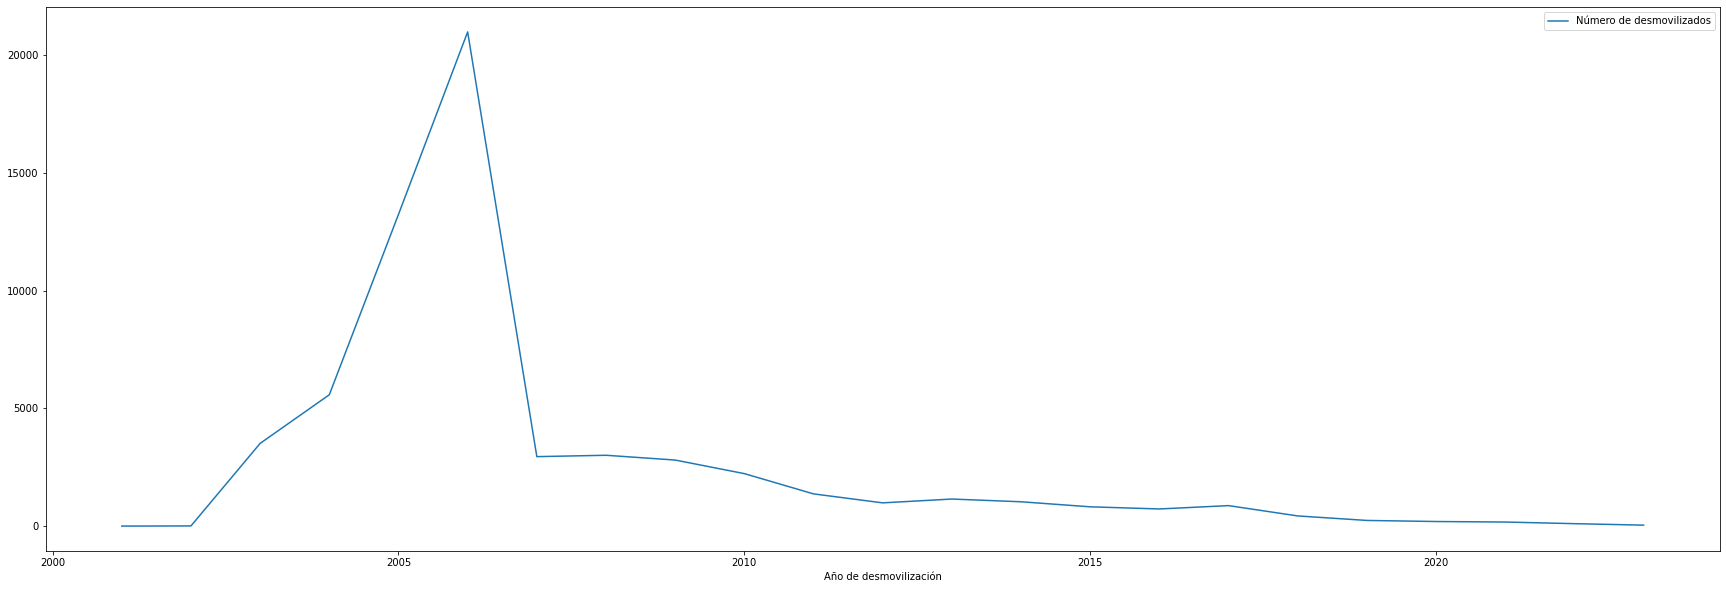

In [ ]:
#Grafica
org.sum().plot(figsize=(30, 10))

In [ ]:
#Desmovilizados por departamento
desmovilizados = results_df.drop(columns=['anhodesmovilizacion','fechacorte','fechaactualizacion'])
desmovilizados["numerodesmovilizados"] = desmovilizados["numerodesmovilizados"].astype(int)
desmovilizados["departamento"] = desmovilizados["departamento"].astype(str)
df_new = desmovilizados.rename(columns={'departamento': 'Departamento', 'numerodesmovilizados': 'Número de desmovilizados'})
org = df_new.groupby('Departamento')
org.sum()

,Número de desmovilizados
Departamento,
<Por Asignar>,6688
Amazonas,31
Antioquia,12674
Arauca,286
Archipiélago de San Andrés. Providencia y Santa Catalina,3
Atlántico,1456
Bogotá D.C.,5754
Bolívar,1407
Boyacá,878


<AxesSubplot:xlabel='Departamento'>

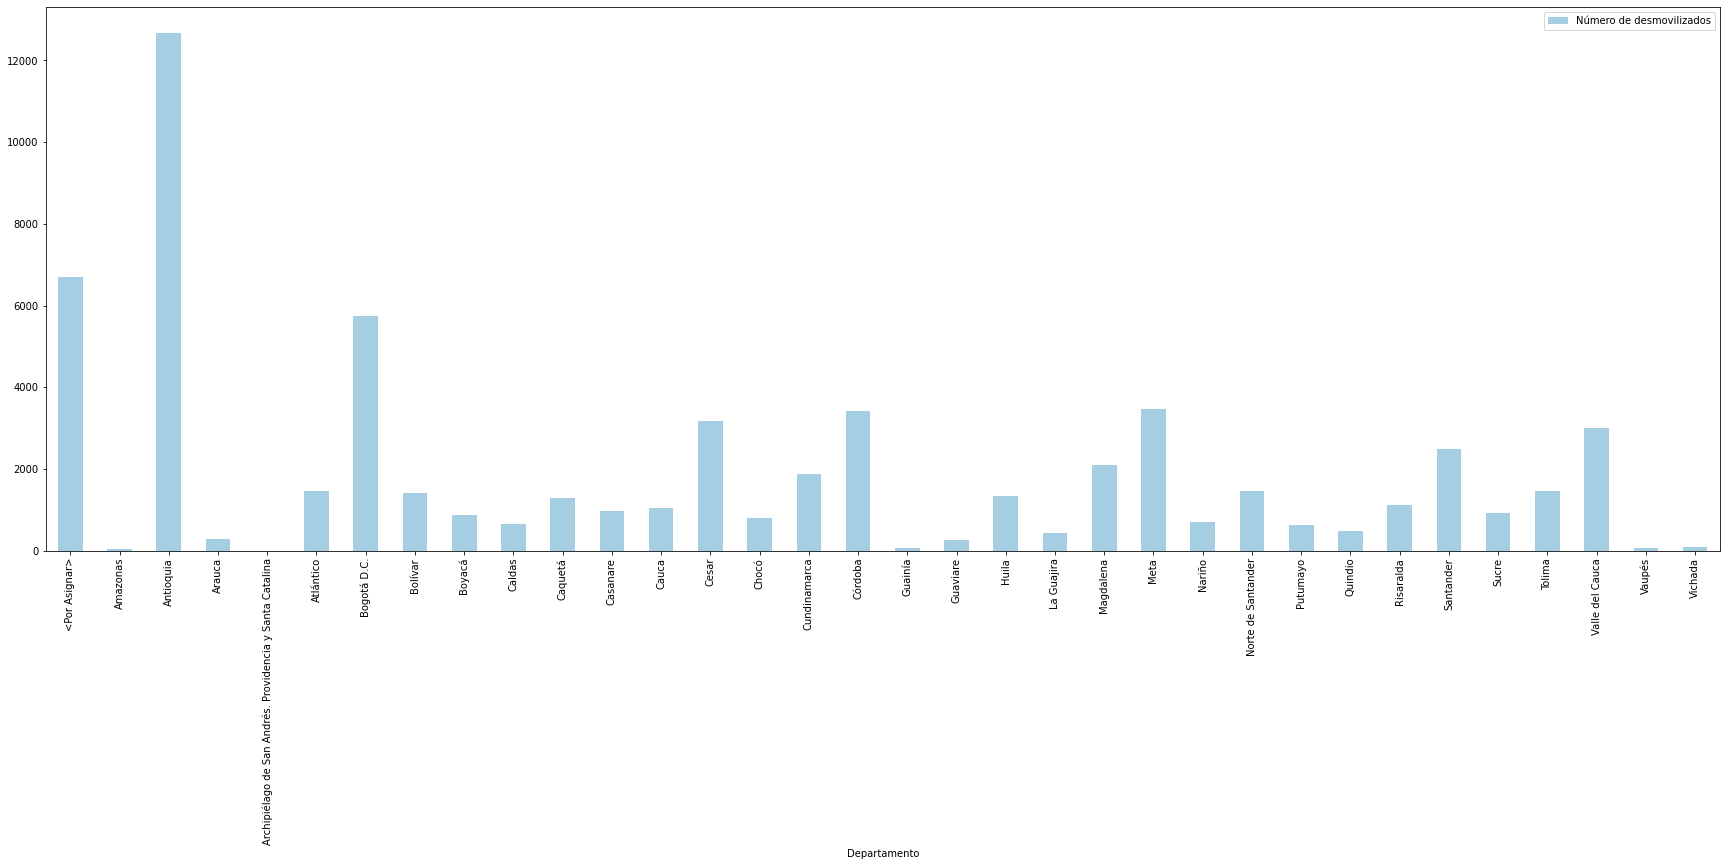

In [ ]:
#Gráfica
org.sum().plot.bar(figsize=(30, 10), colormap='Paired')

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!